In [2]:
import os
import cv2
import json
import importlib
import numpy as np
from PIL import Image
from IPython.display import display
import utils.process_utils as process_utils
importlib.reload(process_utils)

<module 'utils.dataset_process' from '/home/shitianhao/project/DatProc/utils/dataset_process.py'>

In [3]:
# open json file
json_path = '/datar/DAD-3DHeads/val/meta_1-1.json'

image_folder_dir = os.path.dirname(json_path)

with open(json_path) as json_file:
    data = json.load(json_file)


In [ ]:
vis_sample = 20

for img_path, meta in data.items():
    # load image
    abs_img_path = os.path.join(image_folder_dir, img_path)
    for box_id, box_meta in meta.items():
        lm = box_meta['landmarks']
        box = box_meta['head_box']
        if lm is None: continue
        img = cv2.imread(abs_img_path)
        box_x, box_y, box_w, box_h = box
        box_img = img[box_y:box_y+box_h, box_x:box_x+box_w].copy()
        vis_scale = 512/box_h
        for pt in lm:
            pt = (int(pt[0]), int(pt[1]))
            cv2.circle(box_img, pt, int(4/vis_scale), [0, 255, 0], -1)
        box_img_ = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
        box_img_ = cv2.resize(box_img_, (512, 512))
        display(Image.fromarray(box_img_))
        vis_sample -= 1
    if vis_sample == 0: break


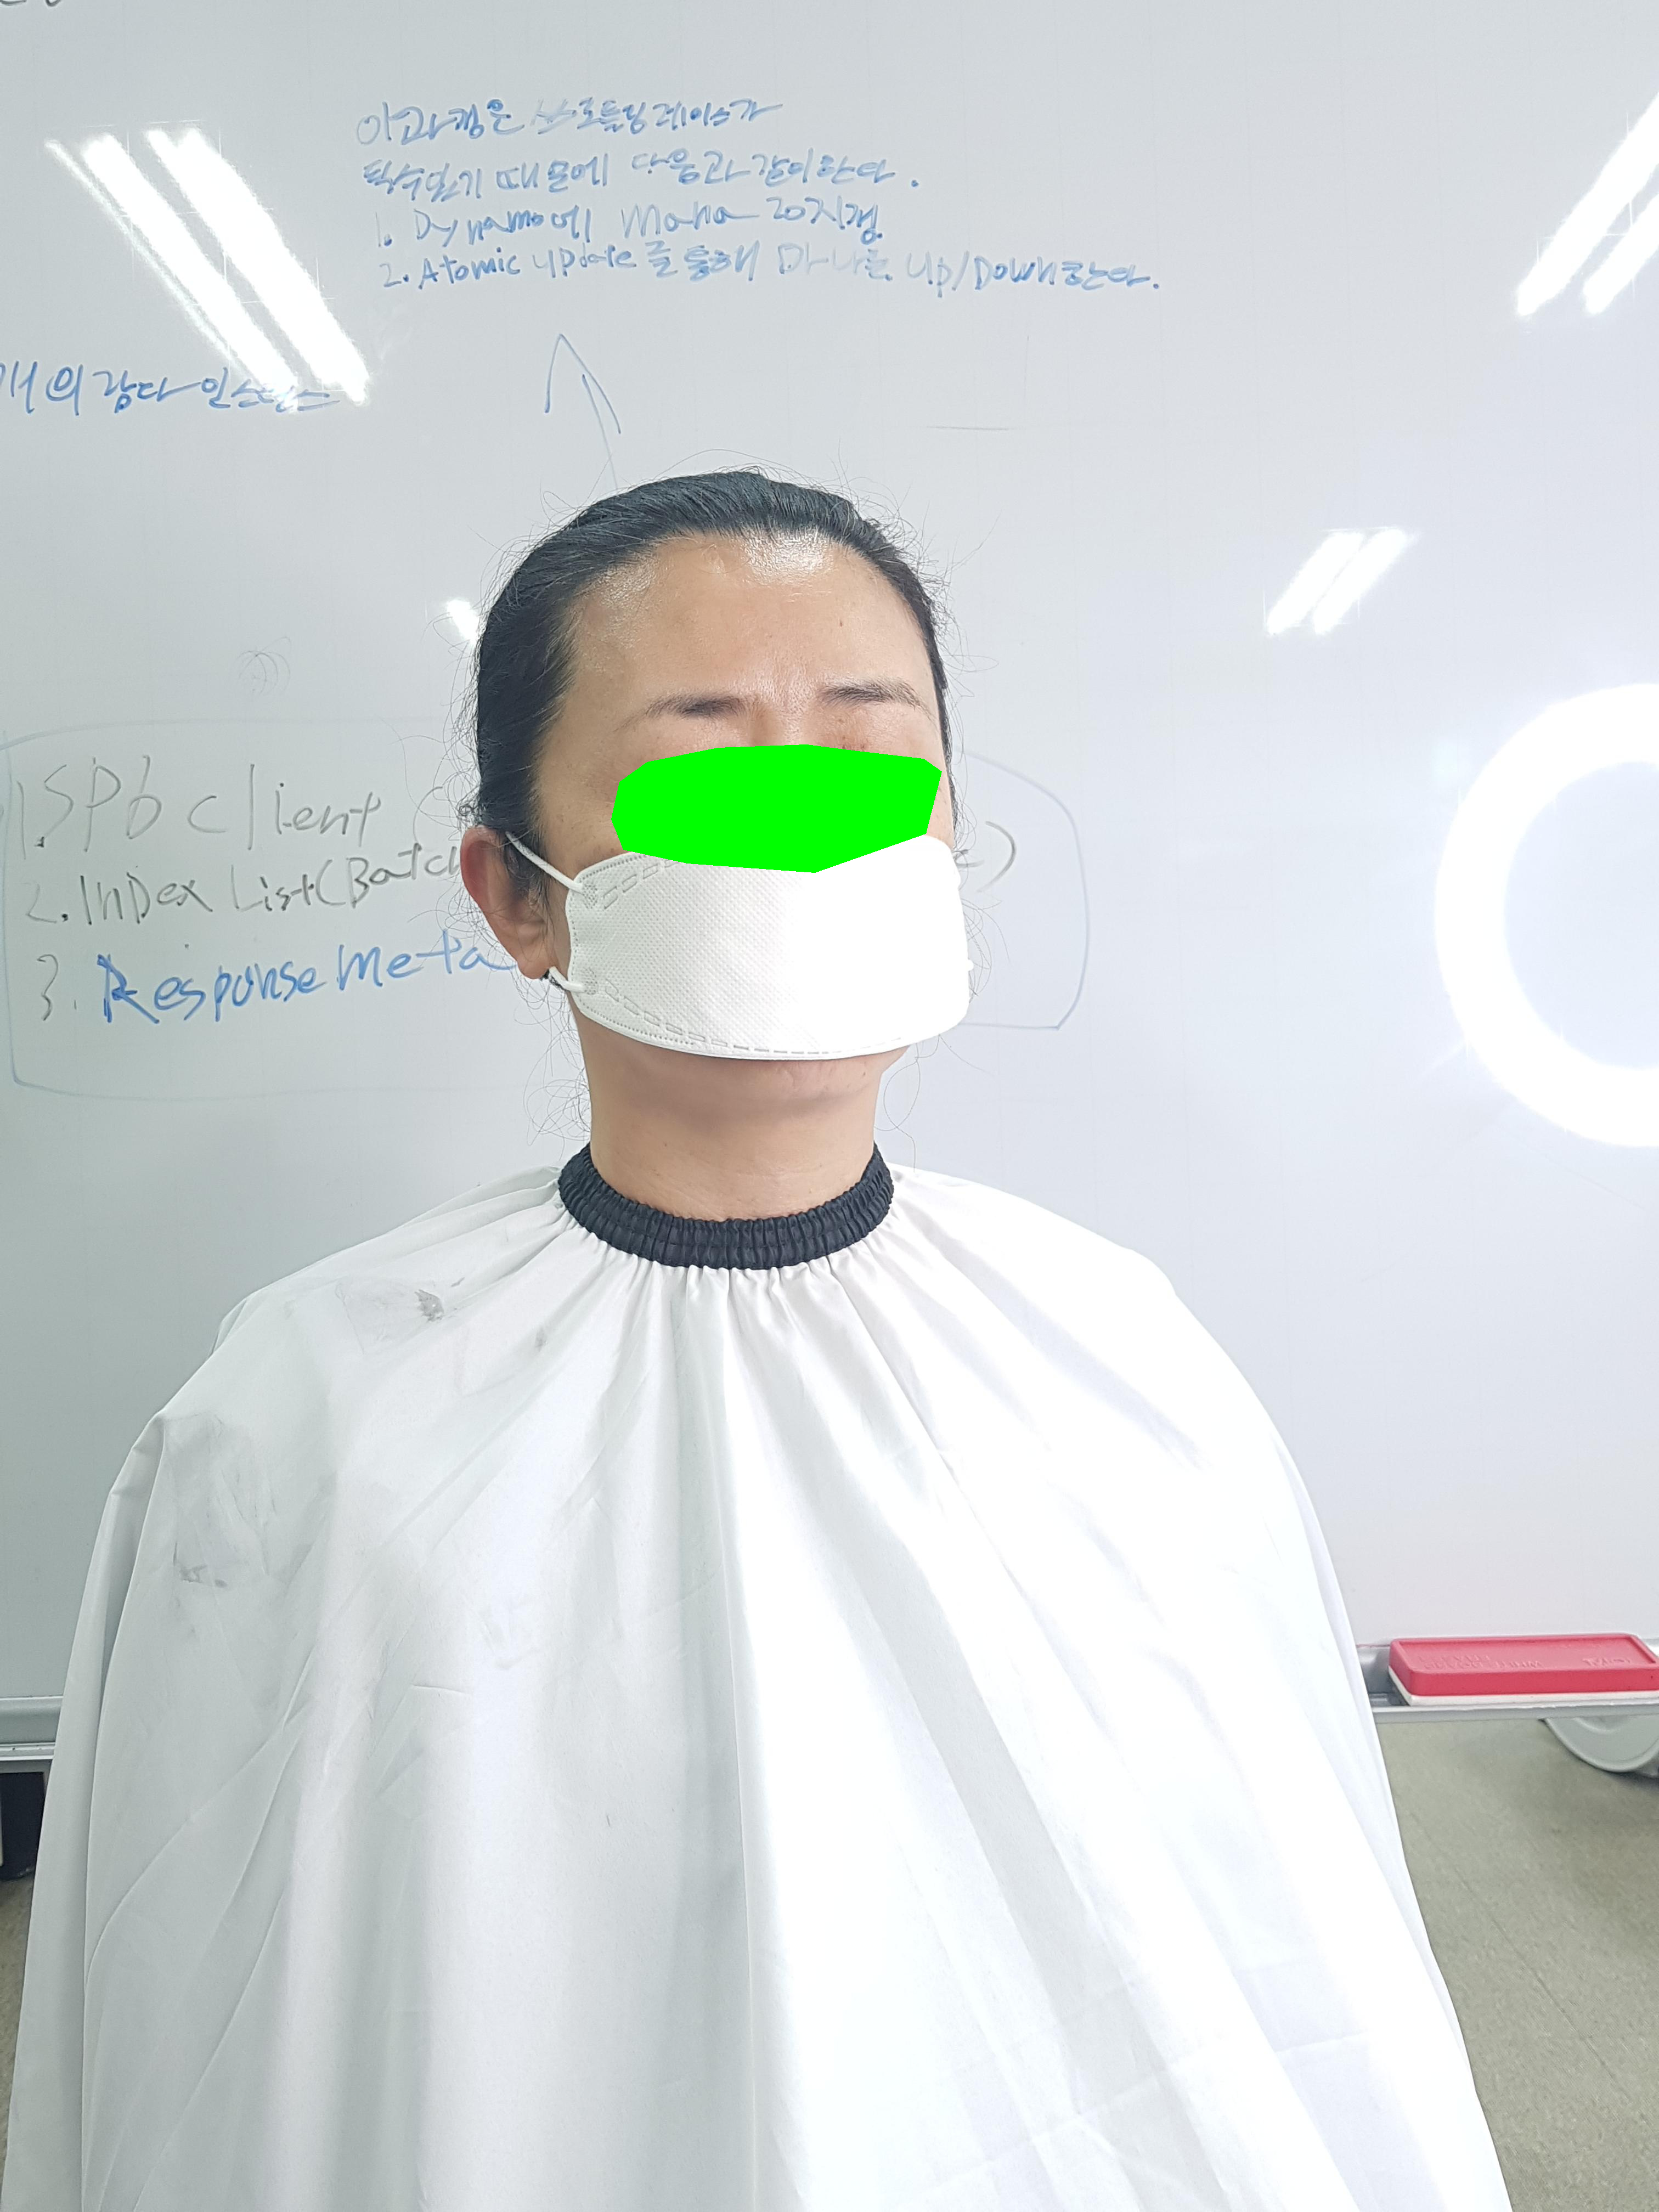

In [5]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
from utils.khs_filter import process_json
khs_sample_json_path = './assets/MN322068_040.json'
image_path = './assets/MN322068-040.jpg'
polygon = process_json(khs_sample_json_path)

image = np.array(Image.open(image_path))
h, w = image.shape[:2]
scale = 512/h
coords_list = []
for pt in polygon:
    pt_coord = [int(pt['x']), int(pt['y'])]
    # cv2.circle(image, pt_coord, int(2/scale), [0, 255, 0], -1)
    coords_list.append(pt_coord)
coords = np.array(coords_list).reshape((-1, 1, 2))
image = cv2.fillPoly(image, [coords], color=[0, 255, 0])
# image = cv2.resize(image, (0,0), fx=scale, fy=scale)
display(Image.fromarray(image))